In [12]:
# Importer les bibliothèques nécessaires
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Charger les données
file_path = "mushroom_cleaned.csv"  # Remplace par ton chemin de fichier
data = pd.read_csv(file_path)

In [14]:
# Aperçu des données
print("Aperçu des données :")
print(data.head())
print("\nInformations sur les données :")
print(data.info())

Aperçu des données :
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  

Informations sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64 

In [15]:
# Statistiques descriptives 
print("\nStatistiques descriptives :")
print(data.describe())


Statistiques descriptives :
       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.00000

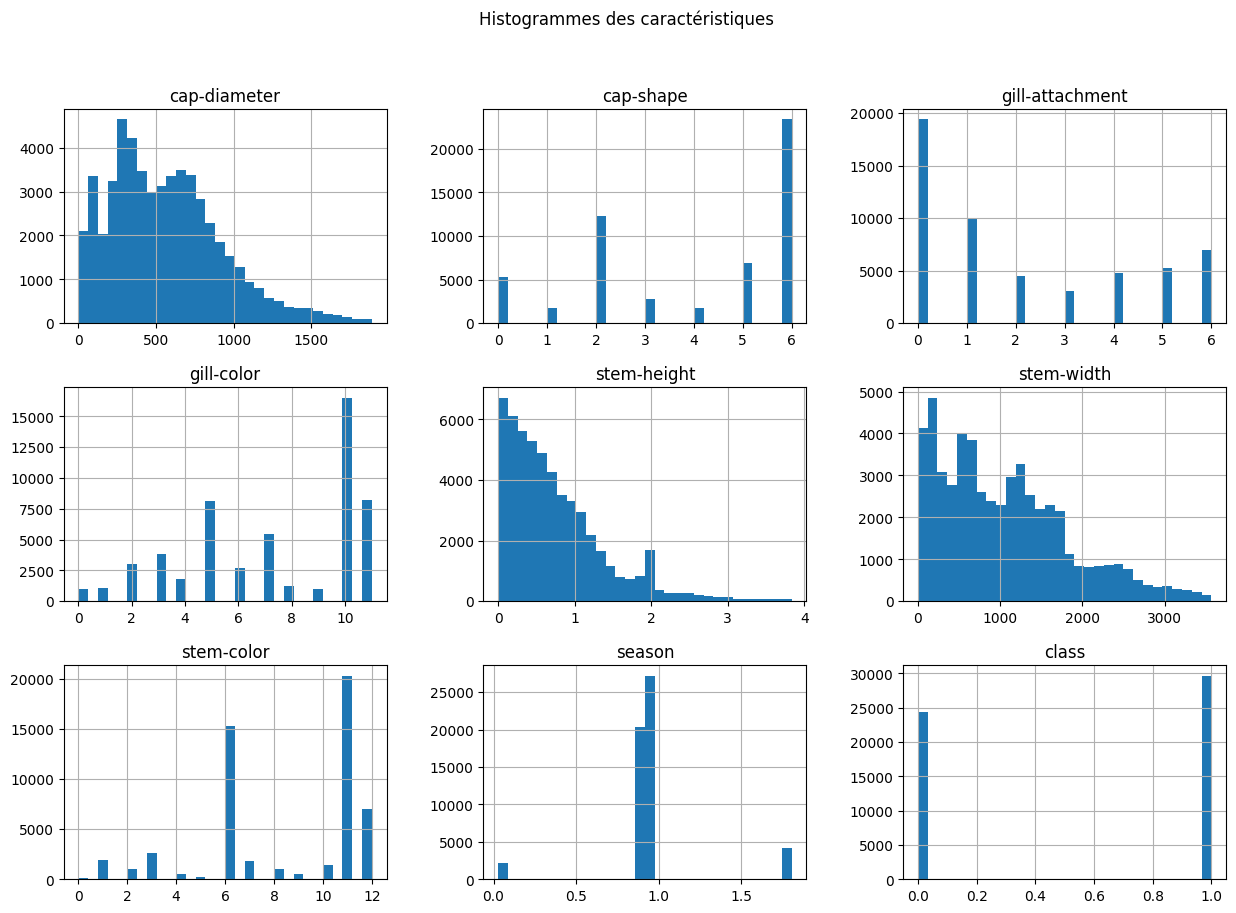

In [16]:
# Histogrammes pour chaque caractéristique 
data.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogrammes des caractéristiques")
plt.show()

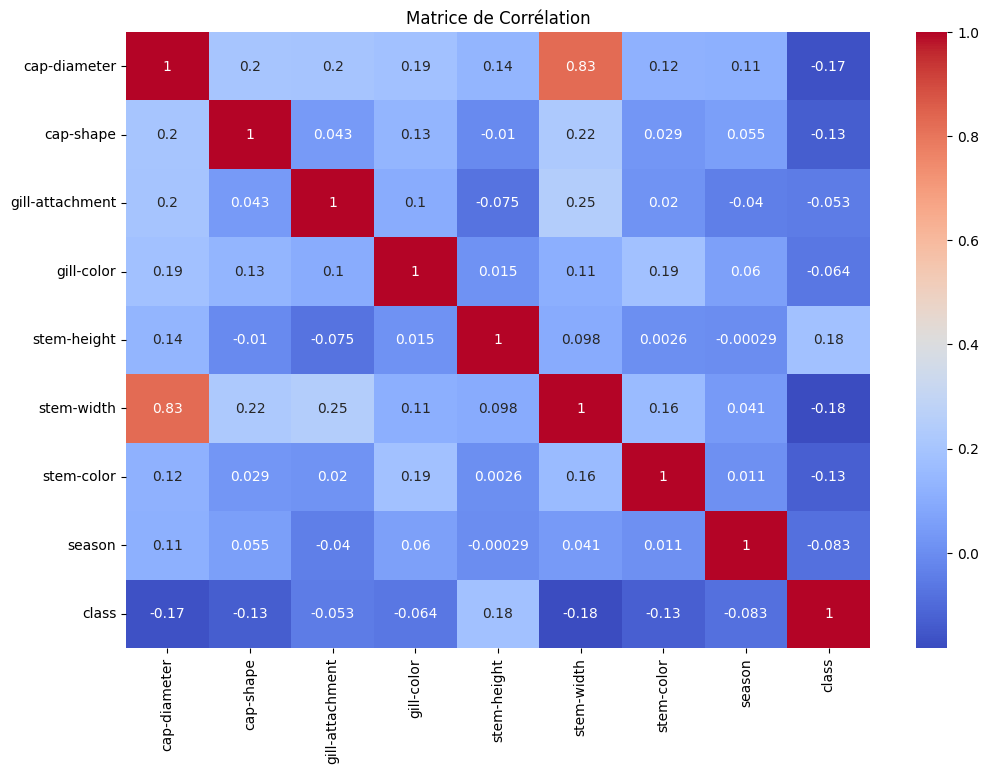

In [17]:
# Matrice de corrélation et heatmap 
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de Corrélation")
plt.show()

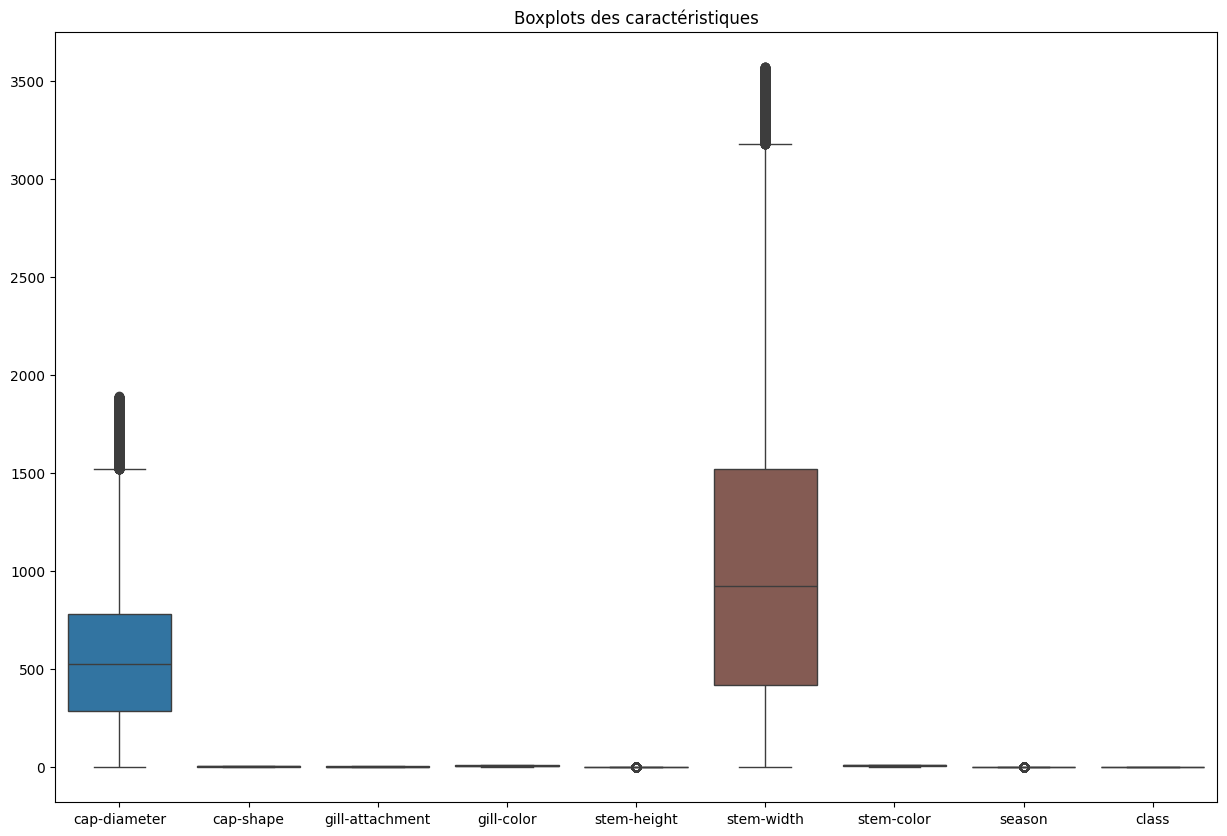

In [18]:
# Boxplots pour visualiser la distribution des valeurs 
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Boxplots des caractéristiques")
plt.show()

In [19]:
# Séparer les caractéristiques (features) et la classe cible (target) 
X = data.drop('class', axis=1) # Toutes les colonnes sauf 'class' 
y = data['class'] # Colonne cible 
# Diviser les données en ensembles d'entraînement et de test (80% pour l'entraînement)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Créer et entraîner un modèle Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer le modèle
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))


Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4909
           1       0.99      0.99      0.99      5898

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807



In [22]:
# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)


Matrice de confusion :
[[4856   53]
 [  45 5853]]


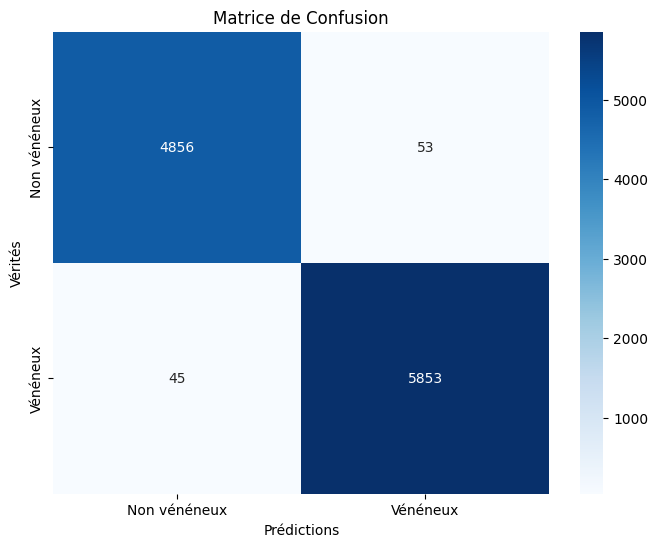

In [23]:
# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non vénéneux", "Vénéneux"], yticklabels=["Non vénéneux", "Vénéneux"])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Vérités")
plt.show()

In [24]:
# Analyser les relations intéressantes
# Exemple de relation : couleur de pied et dangerosité 
print("\nAnalyse des relations intéressantes :")
print(data.groupby('stem-color')['class'].value_counts(normalize=True))


Analyse des relations intéressantes :
stem-color  class
0           0        1.000000
1           1        0.719499
            0        0.280501
2           1        1.000000
3           0        0.607007
            1        0.392993
4           1        1.000000
5           1        0.535398
            0        0.464602
6           1        0.622878
            0        0.377122
7           1        0.535714
            0        0.464286
8           1        0.871220
            0        0.128780
9           1        0.789279
            0        0.210721
10          1        0.617373
            0        0.382627
11          0        0.592755
            1        0.407245
12          1        0.644577
            0        0.355423
Name: proportion, dtype: float64
